# Based on the BooK: Deep Learning Illustrated (2020)
https://github.com/the-deep-learners/deep-learning-illustrated

Run from within a Docker container

# Shallow Neural Network in Keras

Build a shallow neural network to classify MNIST digits

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb)

#### Load dependencies

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

Using TensorFlow backend.


#### Load data and split

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

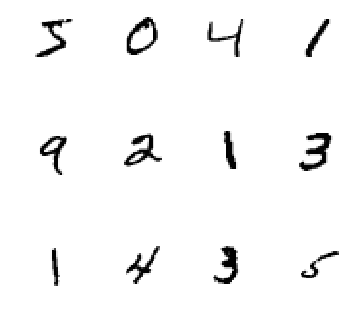

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

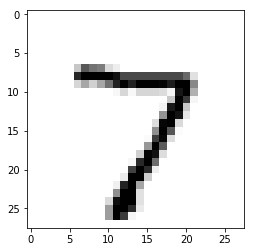

In [9]:
plt.imshow(X_valid[0], cmap='Greys')

In [10]:
'''you can see the seven when ploting pixel levels'''
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_valid[0]

7

#### Preprocess data

In [12]:
'''Flattening 2 dimensional images to 1D and convert to float'''
X_train = X_train.reshape(60000, 784).astype('float32') 
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [13]:
'''change range to 0-1'''
X_train /= 255
X_valid /= 255

In [14]:
X_valid[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [15]:
n_classes = 10 #10 possible digits
y_train = keras.utils.to_categorical(y_train, n_classes) #convert to one hot format
y_valid = keras.utils.to_categorical(y_valid, n_classes) #convert to one hot format

In [16]:
y_valid[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.], dtype=float32)

#### Design neural network architecture

In [17]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,))) # 64 Sigmoid neurons. 28x28 pixels > 784-elements
model.add(Dense(10, activation='softmax')) #10 classes digits

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
(64*784)

50176

In [20]:
#Parameters first layer
(64*784)+64

50240

In [21]:
#Parameters second layer
(10*64)+10

650

#### Configure model

In [22]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

#### Train!

In [23]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 2s 35us/step - loss: 0.0926 - acc: 0.0815 - val_loss: 0.0918 - val_acc: 0.0863
Epoch 2/200
60000/60000 [==============================] - 2s 25us/step - loss: 0.0913 - acc: 0.0903 - val_loss: 0.0909 - val_acc: 0.1029
Epoch 3/200
60000/60000 [==============================] - 2s 29us/step - loss: 0.0906 - acc: 0.1165 - val_loss: 0.0904 - val_acc: 0.1369
Epoch 4/200
60000/60000 [==============================] - 2s 26us/step - loss: 0.0902 - acc: 0.1531 - val_loss: 0.0899 - val_acc: 0.1742
Epoch 5/200
60000/60000 [==============================] - 1s 22us/step - loss: 0.0897 - acc: 0.1891 - val_loss: 0.0896 - val_acc: 0.2142
Epoch 6/200
60000/60000 [==============================] - 1s 24us/step - loss: 0.0894 - acc: 0.2222 - val_loss: 0.0892 - val_acc: 0.2454
Epoch 7/200
60000/60000 [==============================] - 1s 24us/step - loss: 0.0891 - acc: 0.2631 - val_loss: 0.0889 - 

60000/60000 [==============================] - 2s 35us/step - loss: 0.0666 - acc: 0.5828 - val_loss: 0.0660 - val_acc: 0.5912
Epoch 60/200
60000/60000 [==============================] - 2s 25us/step - loss: 0.0661 - acc: 0.5864 - val_loss: 0.0655 - val_acc: 0.5951
Epoch 61/200
60000/60000 [==============================] - 2s 32us/step - loss: 0.0656 - acc: 0.5904 - val_loss: 0.0650 - val_acc: 0.5980
Epoch 62/200
60000/60000 [==============================] - 2s 41us/step - loss: 0.0651 - acc: 0.5932 - val_loss: 0.0645 - val_acc: 0.6025
Epoch 63/200
60000/60000 [==============================] - 4s 63us/step - loss: 0.0646 - acc: 0.5968 - val_loss: 0.0640 - val_acc: 0.6061
Epoch 64/200
60000/60000 [==============================] - 2s 41us/step - loss: 0.0641 - acc: 0.6003 - val_loss: 0.0635 - val_acc: 0.6088
Epoch 65/200
60000/60000 [==============================] - 3s 51us/step - loss: 0.0636 - acc: 0.6036 - val_loss: 0.0630 - val_acc: 0.6123
Epoch 66/200
60000/60000 [==============

Epoch 118/200
60000/60000 [==============================] - 2s 28us/step - loss: 0.0439 - acc: 0.7631 - val_loss: 0.0432 - val_acc: 0.7737
Epoch 119/200
60000/60000 [==============================] - 1s 22us/step - loss: 0.0437 - acc: 0.7643 - val_loss: 0.0429 - val_acc: 0.7747
Epoch 120/200
60000/60000 [==============================] - 2s 25us/step - loss: 0.0434 - acc: 0.7660 - val_loss: 0.0426 - val_acc: 0.7769
Epoch 121/200
60000/60000 [==============================] - 1s 22us/step - loss: 0.0431 - acc: 0.7674 - val_loss: 0.0423 - val_acc: 0.7783
Epoch 122/200
60000/60000 [==============================] - 1s 25us/step - loss: 0.0428 - acc: 0.7690 - val_loss: 0.0421 - val_acc: 0.7792
Epoch 123/200
60000/60000 [==============================] - 1s 23us/step - loss: 0.0426 - acc: 0.7700 - val_loss: 0.0418 - val_acc: 0.7808
Epoch 124/200
60000/60000 [==============================] - 1s 24us/step - loss: 0.0423 - acc: 0.7712 - val_loss: 0.0415 - val_acc: 0.7822
Epoch 125/200
60000/

60000/60000 [==============================] - 1s 24us/step - loss: 0.0318 - acc: 0.8423 - val_loss: 0.0309 - val_acc: 0.8501
Epoch 177/200
60000/60000 [==============================] - 1s 25us/step - loss: 0.0317 - acc: 0.8428 - val_loss: 0.0308 - val_acc: 0.8506
Epoch 178/200
60000/60000 [==============================] - 1s 24us/step - loss: 0.0315 - acc: 0.8436 - val_loss: 0.0306 - val_acc: 0.8512
Epoch 179/200
60000/60000 [==============================] - 2s 26us/step - loss: 0.0314 - acc: 0.8442 - val_loss: 0.0305 - val_acc: 0.8520
Epoch 180/200
60000/60000 [==============================] - 1s 24us/step - loss: 0.0312 - acc: 0.8449 - val_loss: 0.0303 - val_acc: 0.8522
Epoch 181/200
60000/60000 [==============================] - 1s 24us/step - loss: 0.0311 - acc: 0.8457 - val_loss: 0.0302 - val_acc: 0.8528
Epoch 182/200
60000/60000 [==============================] - 1s 24us/step - loss: 0.0310 - acc: 0.8462 - val_loss: 0.0301 - val_acc: 0.8536
Epoch 183/200
60000/60000 [=======

In [24]:
'''Validate'''
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 0s 38us/step


[0.027774476686120032, 0.86309999999999998]